In [2]:
import pandas as pd

# 1. Lecture du fichier CSV
df = pd.read_csv("/content/sample_data/DataFraudCB.csv")  # par défaut sep=","

# 2. Vérifie les 5 premières lignes
print(df.head())

# 3. Vérifie les infos sur les colonnes
print(df.info())


   transaction_id  user_id       amount transaction_type merchant_category  \
0            9608      363  4922.587542              ATM            Travel   
1             456      692    48.018303               QR              Food   
2            4747      587   136.881960           Online            Travel   
3            6934      445    80.534719              POS          Clothing   
4            1646      729   120.041158           Online           Grocery   

  country  hour  device_risk_score  ip_risk_score  is_fraud  
0      TR    12           0.992347       0.947908         1  
1      US    21           0.168571       0.224057         0  
2      TR    14           0.296127       0.125058         0  
3      TR    23           0.124801       0.159243         0  
4      FR    16           0.098129       0.027542         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---

In [3]:
df.isnull().sum()

,0
transaction_id,0
user_id,0
amount,0
transaction_type,0
merchant_category,0
country,0
hour,0
device_risk_score,0
ip_risk_score,0
is_fraud,0


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.dtypes

,0
transaction_id,int64
user_id,int64
amount,float64
transaction_type,object
merchant_category,object
country,object
hour,int64
device_risk_score,float64
ip_risk_score,float64
is_fraud,int64


In [6]:
df.describe()

,transaction_id,user_id,amount,hour,device_risk_score,ip_risk_score,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,500.058700,178.142763,14.247100,0.183773,0.184669,0.050000
std,2886.89568,288.328495,531.647950,5.347383,0.177381,0.175772,0.217956
min,0.00000,0.000000,1.000000,0.000000,0.000030,0.000009,0.000000
25%,2499.75000,247.000000,65.084753,10.000000,0.075721,0.077762,0.000000
50%,4999.50000,503.000000,101.686510,14.000000,0.156583,0.158290,0.000000
75%,7499.25000,750.250000,138.280872,19.000000,0.234939,0.236968,0.000000
max,9999.00000,999.000000,11628.213881,23.000000,0.998737,0.999603,1.000000


In [7]:
df.head()

,transaction_id,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,is_fraud
0,9608,363,4922.587542,ATM,Travel,TR,12,0.992347,0.947908,1
1,456,692,48.018303,QR,Food,US,21,0.168571,0.224057,0
2,4747,587,136.881960,Online,Travel,TR,14,0.296127,0.125058,0
3,6934,445,80.534719,POS,Clothing,TR,23,0.124801,0.159243,0
4,1646,729,120.041158,Online,Grocery,FR,16,0.098129,0.027542,0


In [8]:
fraudTotal = df["is_fraud"].sum()
print(fraudTotal)
fraudPercent = df["is_fraud"].mean()
print(fraudPercent)

500
0.05


In [9]:
fraudCountry = (
    df.groupby("country")["is_fraud"]
    .sum()
    .sort_values(ascending=False)
      )

print(fraudCountry)
print("Attention c'est pas un taux !!")


country
NG    100
US     97
UK     85
TR     75
FR     74
DE     69
Name: is_fraud, dtype: int64
Attention c'est pas un taux !!


In [10]:
PfraudCountry = (fraudCountry / fraudTotal) * 100
PfraudCountry = PfraudCountry.sort_values(ascending=False)
print(PfraudCountry)

country
NG    20.0
US    19.4
UK    17.0
TR    15.0
FR    14.8
DE    13.8
Name: is_fraud, dtype: float64


In [11]:
TFraudCountry = (df.groupby("country")["is_fraud"]
.mean()
.sort_values(ascending=False))
print(TFraudCountry)


country
NG    1.000000
US    0.047317
UK    0.043257
TR    0.038900
FR    0.036507
DE    0.035751
Name: is_fraud, dtype: float64


In [12]:
fraudType = (
    df.groupby("transaction_type")["is_fraud"]
    .sum()
    .sort_values(ascending=False)
      )

print(fraudType)
print("Attention c'est pas un taux !!")

transaction_type
ATM       138
Online    126
QR        120
POS       116
Name: is_fraud, dtype: int64
Attention c'est pas un taux !!


In [13]:
PfraudType = (fraudType / fraudTotal) * 100
PfraudType = PfraudType.sort_values(ascending=False)
print(PfraudType)


transaction_type
ATM       27.6
Online    25.2
QR        24.0
POS       23.2
Name: is_fraud, dtype: float64


In [14]:
TFraudType = (df.groupby("transaction_type")["is_fraud"]
.mean()
.sort_values(ascending=False))
print(TFraudType)


transaction_type
ATM       0.054567
Online    0.052566
QR        0.047885
POS       0.045171
Name: is_fraud, dtype: float64


In [15]:
fraudCategory = (
    df.groupby("merchant_category")["is_fraud"]
    .sum()
    .sort_values(ascending=False)
      )

print(fraudCategory)
print("Attention c'est pas un taux !!")

merchant_category
Clothing       109
Travel         106
Electronics     98
Grocery         95
Food            92
Name: is_fraud, dtype: int64
Attention c'est pas un taux !!


In [16]:
PfraudCategory = (fraudCategory / fraudTotal) * 100
PfraudCategory = PfraudCategory.sort_values(ascending=False)
print(PfraudCategory)

merchant_category
Clothing       21.8
Travel         21.2
Electronics    19.6
Grocery        19.0
Food           18.4
Name: is_fraud, dtype: float64


In [17]:
TFraudCategory = (df.groupby("merchant_category")["is_fraud"]
.mean()
.sort_values(ascending=False))
print(TFraudCategory)

merchant_category
Clothing       0.054995
Travel         0.052605
Electronics    0.048829
Grocery        0.048150
Food           0.045477
Name: is_fraud, dtype: float64


In [18]:
FraudCountryType = (df.groupby(["country", "transaction_type"])["is_fraud"]
.mean())
print(FraudCountryType)

country  transaction_type
DE       ATM                 0.039916
         Online              0.035794
         POS                 0.024254
         QR                  0.044586
FR       ATM                 0.043393
         Online              0.040404
         POS                 0.026639
         QR                  0.035382
NG       ATM                 1.000000
         Online              1.000000
         POS                 1.000000
         QR                  1.000000
TR       ATM                 0.045652
         Online              0.051502
         POS                 0.037549
         QR                  0.022177
UK       ATM                 0.043564
         Online              0.036093
         POS                 0.050813
         QR                  0.042254
US       ATM                 0.045290
         Online              0.040900
         POS                 0.051233
         QR                  0.051867
Name: is_fraud, dtype: float64


In [19]:
FraudCountryCategory = (df.groupby(["country", "merchant_category"])["is_fraud"]
.mean())
print(FraudCountryCategory)

country  merchant_category
DE       Clothing             0.041322
         Electronics          0.029810
         Food                 0.029268
         Grocery              0.031169
         Travel               0.047146
FR       Clothing             0.044084
         Electronics          0.038168
         Food                 0.027027
         Grocery              0.023316
         Travel               0.048780
NG       Clothing             1.000000
         Electronics          1.000000
         Food                 1.000000
         Grocery              1.000000
         Travel               1.000000
TR       Clothing             0.033854
         Electronics          0.030928
         Food                 0.032995
         Grocery              0.040404
         Travel               0.057377
UK       Clothing             0.063325
         Electronics          0.040000
         Food                 0.036745
         Grocery              0.043716
         Travel               0.03381

In [20]:
FraudHourCountry = (df.groupby(["hour", "country"])["is_fraud"]
.mean()
.to_string())
print(FraudHourCountry)

hour  country
0     DE         1.000000
      FR         1.000000
      NG         1.000000
      TR         1.000000
      UK         1.000000
      US         1.000000
1     DE         1.000000
      FR         1.000000
      NG         1.000000
      TR         1.000000
      US         1.000000
2     DE         1.000000
      NG         1.000000
      TR         1.000000
      UK         1.000000
      US         1.000000
3     DE         1.000000
      FR         1.000000
      NG         1.000000
      TR         1.000000
      UK         1.000000
      US         1.000000
4     DE         1.000000
      FR         1.000000
      NG         1.000000
      TR         1.000000
      UK         1.000000
      US         1.000000
5     FR         1.000000
      NG         1.000000
      TR         1.000000
      UK         1.000000
      US         1.000000
6     DE         0.033333
      FR         0.039683
      NG         1.000000
      TR         0.000000
      UK         0.08421

In [21]:
FraudHourCountry1 = (df.groupby(["hour", "country"])["is_fraud"]
.agg(["mean", "sum", "count"])
.to_string())
print(FraudHourCountry1)


                  mean  sum  count
hour country                      
0    DE       1.000000    3      3
     FR       1.000000    1      1
     NG       1.000000    5      5
     TR       1.000000    1      1
     UK       1.000000    3      3
     US       1.000000    3      3
1    DE       1.000000    3      3
     FR       1.000000    4      4
     NG       1.000000    1      1
     TR       1.000000    2      2
     US       1.000000    1      1
2    DE       1.000000    3      3
     NG       1.000000    3      3
     TR       1.000000    3      3
     UK       1.000000    3      3
     US       1.000000    4      4
3    DE       1.000000    2      2
     FR       1.000000    2      2
     NG       1.000000    4      4
     TR       1.000000    3      3
     UK       1.000000    4      4
     US       1.000000    3      3
4    DE       1.000000   17     17
     FR       1.000000   16     16
     NG       1.000000   28     28
     TR       1.000000   17     17
     UK       1.0000

In [22]:
FraudCountryType1 = (df.groupby(["country" , "transaction_type"])["is_fraud"]
   .agg(["mean", "sum", "count"]))
print(FraudCountryType1)


                              mean  sum  count
country transaction_type                      
DE      ATM               0.039916   19    476
        Online            0.035794   16    447
        POS               0.024254   13    536
        QR                0.044586   21    471
FR      ATM               0.043393   22    507
        Online            0.040404   20    495
        POS               0.026639   13    488
        QR                0.035382   19    537
NG      ATM               1.000000   29     29
        Online            1.000000   29     29
        POS               1.000000   19     19
        QR                1.000000   23     23
TR      ATM               0.045652   21    460
        Online            0.051502   24    466
        POS               0.037549   19    506
        QR                0.022177   11    496
UK      ATM               0.043564   22    505
        Online            0.036093   17    471
        POS               0.050813   25    492
        QR   

In [23]:
FraudCountryCategory1 = (df.groupby(["country" , "merchant_category"])["is_fraud"]
   .agg(["mean", "sum", "count"]))
print(FraudCountryCategory1)

                               mean  sum  count
country merchant_category                      
DE      Clothing           0.041322   15    363
        Electronics        0.029810   11    369
        Food               0.029268   12    410
        Grocery            0.031169   12    385
        Travel             0.047146   19    403
FR      Clothing           0.044084   19    431
        Electronics        0.038168   15    393
        Food               0.027027   11    407
        Grocery            0.023316    9    386
        Travel             0.048780   20    410
NG      Clothing           1.000000   23     23
        Electronics        1.000000   17     17
        Food               1.000000   23     23
        Grocery            1.000000   21     21
        Travel             1.000000   16     16
TR      Clothing           0.033854   13    384
        Electronics        0.030928   12    388
        Food               0.032995   13    394
        Grocery            0.040404   16

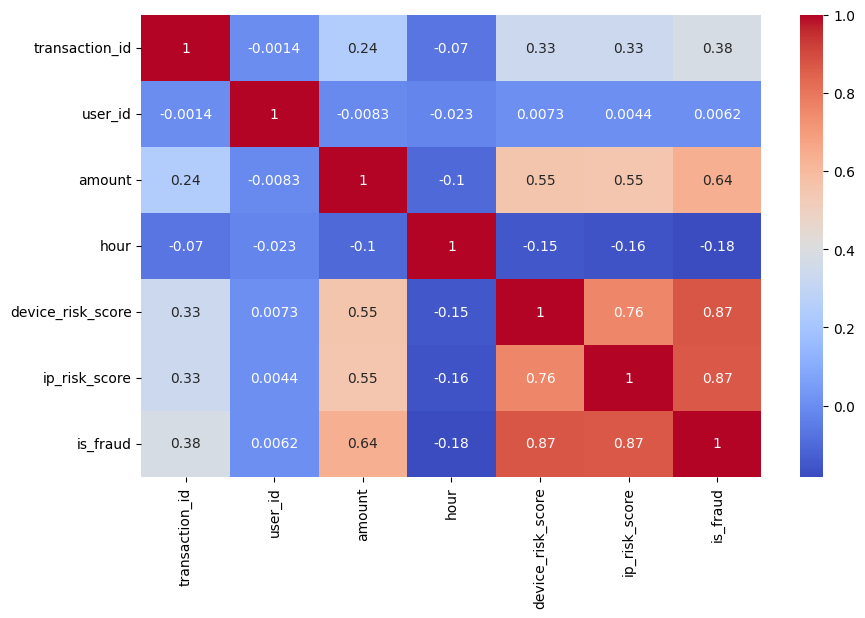

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()



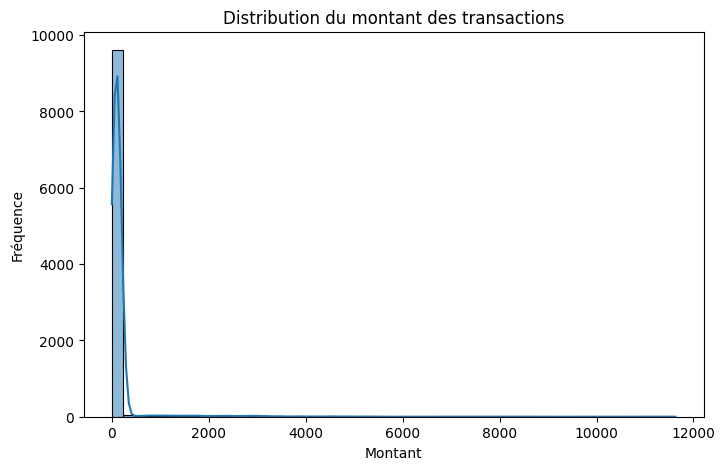

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df["amount"], bins=50, kde=True)
plt.title("Distribution du montant des transactions")
plt.xlabel("Montant")
plt.ylabel("Fréquence")
plt.show()


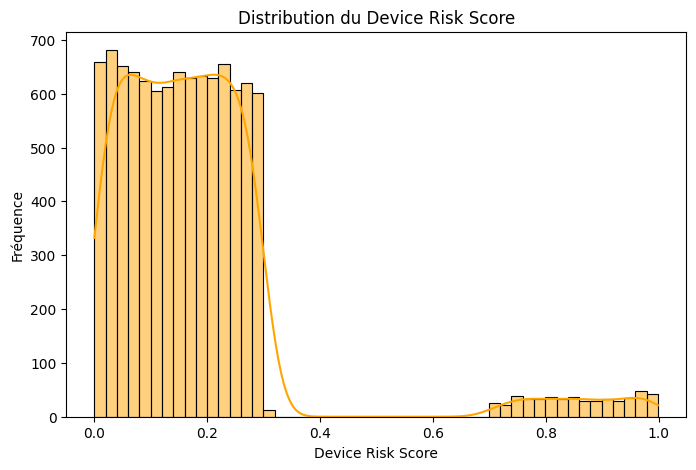

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df["device_risk_score"], bins=50, kde=True, color="orange")
plt.title("Distribution du Device Risk Score")
plt.xlabel("Device Risk Score")
plt.ylabel("Fréquence")
plt.show()


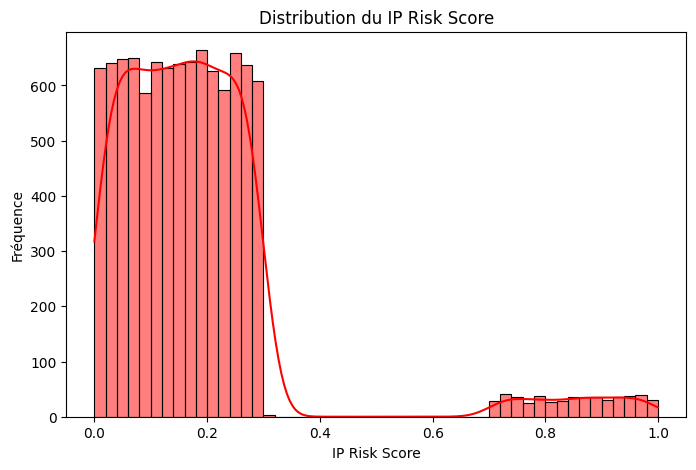

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(df["ip_risk_score"], bins=50, kde=True, color="red")
plt.title("Distribution du IP Risk Score")
plt.xlabel("IP Risk Score")
plt.ylabel("Fréquence")
plt.show()


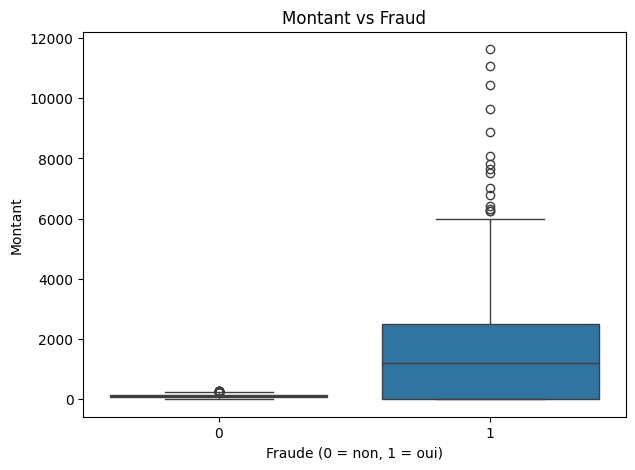

In [28]:
plt.figure(figsize=(7,5))
sns.boxplot(x="is_fraud", y="amount", data=df)
plt.title("Montant vs Fraud")
plt.xlabel("Fraude (0 = non, 1 = oui)")
plt.ylabel("Montant")
plt.show()


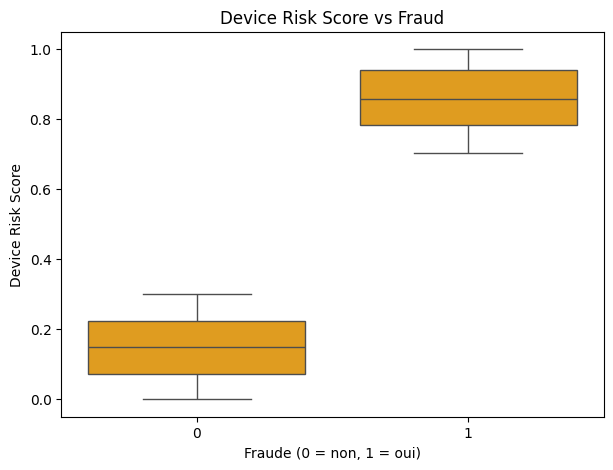

In [29]:
plt.figure(figsize=(7,5))
sns.boxplot(x="is_fraud", y="device_risk_score", data=df, color="orange")
plt.title("Device Risk Score vs Fraud")
plt.xlabel("Fraude (0 = non, 1 = oui)")
plt.ylabel("Device Risk Score")
plt.show()


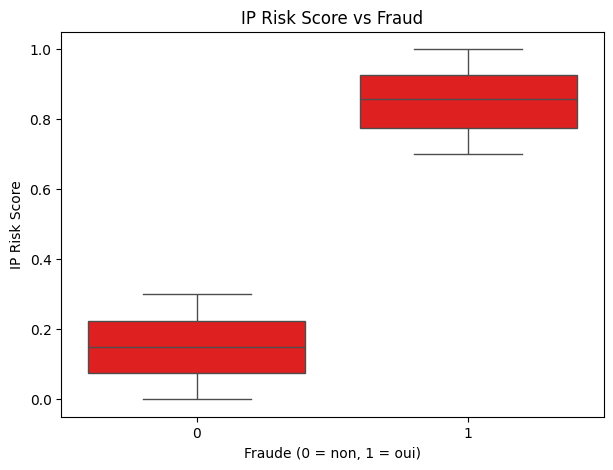

In [30]:
plt.figure(figsize=(7,5))
sns.boxplot(x="is_fraud", y="ip_risk_score", data=df, color="red")
plt.title("IP Risk Score vs Fraud")
plt.xlabel("Fraude (0 = non, 1 = oui)")
plt.ylabel("IP Risk Score")
plt.show()


In [31]:
# 1. Gros montant
df["is_high_amount"] = (df["amount"] > 1000).astype(int)

# 2. Transaction de nuit
df["is_night"] = df["hour"].isin([0, 1, 2, 3, 4, 5]).astype(int)

# 3. Device très risqué
df["is_high_device_risk"] = (df["device_risk_score"] >= 0.7).astype(int)

# 4. IP très risquée
df["is_high_ip_risk"] = (df["ip_risk_score"] >= 0.7).astype(int)

# 5. Score combiné
df["combined_risk_score"] = (df["device_risk_score"] + df["ip_risk_score"]) / 2


In [32]:
df.head()

,transaction_id,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,is_fraud,is_high_amount,is_night,is_high_device_risk,is_high_ip_risk,combined_risk_score
0,9608,363,4922.587542,ATM,Travel,TR,12,0.992347,0.947908,1,1,0,1,1,0.970127
1,456,692,48.018303,QR,Food,US,21,0.168571,0.224057,0,0,0,0,0,0.196314
2,4747,587,136.881960,Online,Travel,TR,14,0.296127,0.125058,0,0,0,0,0,0.210592
3,6934,445,80.534719,POS,Clothing,TR,23,0.124801,0.159243,0,0,0,0,0,0.142022
4,1646,729,120.041158,Online,Grocery,FR,16,0.098129,0.027542,0,0,0,0,0,0.062835


In [33]:
df.groupby("is_high_amount")["is_fraud"].mean()


,is_fraud
is_high_amount,
0,0.022734
1,1.000000


In [34]:

df.groupby("is_night")["is_fraud"].mean()

,is_fraud
is_night,
0,0.031304
1,1.000000


In [35]:
df.groupby("is_high_device_risk")["is_fraud"].mean()


,is_fraud
is_high_device_risk,
0,0.0
1,1.0


In [36]:
df.groupby("is_high_ip_risk")["is_fraud"].mean()


,is_fraud
is_high_ip_risk,
0,0.0
1,1.0


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. Encodage des variables catégorielles
df_encoded = pd.get_dummies(df, columns=["transaction_type", "merchant_category", "country"], drop_first=True)

# 2. Séparation X et y
X = df_encoded.drop("is_fraud", axis=1)
y = df_encoded["is_fraud"]

# 3. Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Modèle
model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train_scaled, y_train)

# 6. Prédictions
y_pred_lr = model_lr.predict(X_test_scaled)

# 7. Évaluation
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1887
           1       1.00      1.00      1.00       113

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix:
[[1887    0]
 [   0  113]]


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Modèle Random Forest
model_rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1
)

model_rf.fit(X_train, y_train)

# Prédictions
y_pred_rf = model_rf.predict(X_test)

# Évaluation
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1887
           1       1.00      1.00      1.00       113

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix:
[[1887    0]
 [   0  113]]


In [39]:
import pandas as pd
import numpy as np

# Récupérer les importances
importances = model_rf.feature_importances_
feature_names = X_train.columns

# Créer un DataFrame trié
feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

feat_imp.head(20)


,feature,importance
10,combined_risk_score,2.164518e-01
0,transaction_id,1.496659e-01
8,is_high_device_risk,1.456887e-01
4,device_risk_score,1.420327e-01
9,is_high_ip_risk,1.237109e-01
5,ip_risk_score,1.230060e-01
2,amount,5.349193e-02
6,is_high_amount,1.970331e-02
3,hour,1.392057e-02
7,is_night,6.226690e-03


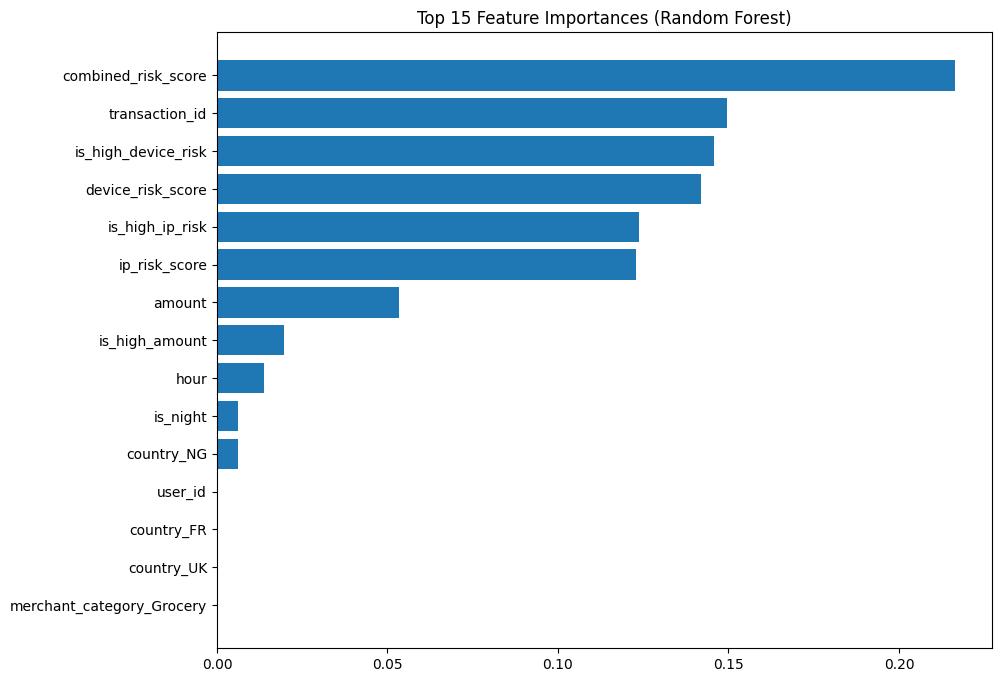

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.barh(feat_imp["feature"][:15], feat_imp["importance"][:15])
plt.gca().invert_yaxis()  # pour avoir les plus importantes en haut
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()


In [41]:
# On retire transaction_id et user_id du dataset
df_no_id = df_encoded.drop(["transaction_id", "user_id"], axis=1)

# On recalcule X et y
X = df_no_id.drop("is_fraud", axis=1)
y = df_no_id["is_fraud"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
model_rf_no_id = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=None,
    n_jobs=-1
)

model_rf_no_id.fit(X_train, y_train)

# Prédictions
y_pred_rf_no_id = model_rf_no_id.predict(X_test)

# Importances
importances_no_id = model_rf_no_id.feature_importances_
feature_names_no_id = X_train.columns

feat_imp_no_id = pd.DataFrame({
    "feature": feature_names_no_id,
    "importance": importances_no_id
}).sort_values(by="importance", ascending=False)

feat_imp_no_id.head(15)


,feature,importance
6,is_high_device_risk,0.199628
7,is_high_ip_risk,0.169889
8,combined_risk_score,0.165461
2,device_risk_score,0.164190
3,ip_risk_score,0.159452
0,amount,0.073225
4,is_high_amount,0.037331
1,hour,0.013416
5,is_night,0.010928
17,country_NG,0.006435
